1. Dataset Preprocessing:

1.1. Data calling and printing:

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

dataframe = pd.read_csv(r"C:\Users\Moaiad\Documents\3D-Printing-Technology\data\dataset_3D-Printing.csv")

# print(dataframe.head())
dataframe.head(10)

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,Bed_temperature,Print_speed,Material,Fan_speed,Roughness,Tension_strenght,Elongation
0,0.02,8.0,90,grid,220,60,40,abs,0,25,18,1.20
1,0.02,7.0,90,honeycomb,225,65,40,abs,25,32,16,1.40
2,0.02,1.0,80,grid,230,70,40,abs,50,40,8,0.80
3,0.02,4.0,70,honeycomb,240,75,40,abs,75,68,10,0.50
4,0.02,6.0,90,grid,250,80,40,abs,100,92,5,0.70
5,0.02,10.0,40,honeycomb,200,60,40,pla,0,60,24,1.10
6,0.02,8.0,90,grid,250,100,40,abs,100,98,5,0.95
7,0.02,10.0,10,honeycomb,210,70,40,pla,50,21,14,1.50
8,0.02,9.0,70,grid,215,75,40,pla,75,24,27,1.40
9,0.02,8.0,40,honeycomb,220,80,40,pla,100,30,25,1.70


1.2. Determination of the data-shape and checking the NaN-Values:

In [2]:
# Determining the Dataset-Shape:
print("The target-dataset is defined by {} [Instance/Features]".format(dataframe.shape))

# checking the NaN-Values in the DataFrame:
for column in dataframe:
    if dataframe[column].isna().sum() >=0:
        print("Feature {} has {} NaN-Values".format(dataframe[column], dataframe[column].isna().sum()))
    else:
        print("Feature {} has no NaN-Instances".format(dataframe[column]))


The target-dataset is defined by (66, 12) [Instance/Features]
Feature 0     0.02
1     0.02
2     0.02
3     0.02
4     0.02
      ... 
61    0.06
62    0.04
63    0.02
64    0.05
65    0.15
Name: layer_height, Length: 66, dtype: float64 has 0 NaN-Values
Feature 0     8.0
1     7.0
2     1.0
3     4.0
4     6.0
     ... 
61    9.0
62    2.0
63    4.5
64    6.0
65    1.0
Name: wall_thickness, Length: 66, dtype: float64 has 0 NaN-Values
Feature 0     90
1     90
2     80
3     70
4     90
      ..
61    10
62    80
63    70
64    10
65    50
Name: infill_density, Length: 66, dtype: int64 has 0 NaN-Values
Feature 0          grid
1     honeycomb
2          grid
3     honeycomb
4          grid
        ...    
61    honeycomb
62         grid
63    honeycomb
64    honeycomb
65         grid
Name: infill_pattern, Length: 66, dtype: object has 0 NaN-Values
Feature 0     220
1     225
2     230
3     240
4     250
     ... 
61    200
62    230
63    240
64    245
65    220
Name: nozzle_temperatur

1.3. Encoding the kategorical Features utilizing LabelEncoder:

In [ ]:
# Encoding the kategorigal Features "Infill Pattern" and "Material" utilizing LabelEncoder:
dataframe["infill_pattern"] = LabelEncoder().fit_transform(dataframe['infill_pattern'])
dataframe["Material"] = LabelEncoder().fit_transform(dataframe['Material'])
dataframe.head()


,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,Bed_temperature,Print_speed,Material,Fan_speed,Roughness,Tension_strenght,Elongation
0,0.02,8.0,90,0,220,60,40,0,0,25,18,1.2
1,0.02,7.0,90,1,225,65,40,0,25,32,16,1.4
2,0.02,1.0,80,0,230,70,40,0,50,40,8,0.8
3,0.02,4.0,70,1,240,75,40,0,75,68,10,0.5
4,0.02,6.0,90,0,250,80,40,0,100,92,5,0.7


1.4. Deterimning the correlation between the 3D/Printing Features (numerical & graphical): 

                    layer_height  wall_thickness  infill_density  \
layer_height            1.000000       -0.282933       -0.013763   
wall_thickness         -0.282933        1.000000        0.025534   
infill_density         -0.013763        0.025534        1.000000   
infill_pattern         -0.008872        0.224150       -0.183799   
nozzle_temperature     -0.030562       -0.130299        0.213167   
Bed_temperature        -0.120838        0.061974        0.119221   
Print_speed             0.044329       -0.341273       -0.048114   
Material                0.041406        0.150562       -0.099981   
Fan_speed              -0.040571        0.050462        0.035763   
Roughness               0.773096       -0.240834        0.037378   
Tension_strenght        0.325276        0.336492        0.278869   
Elongation              0.482438        0.150234        0.118003   

                    infill_pattern  nozzle_temperature  Bed_temperature  \
layer_height             -0.008872      

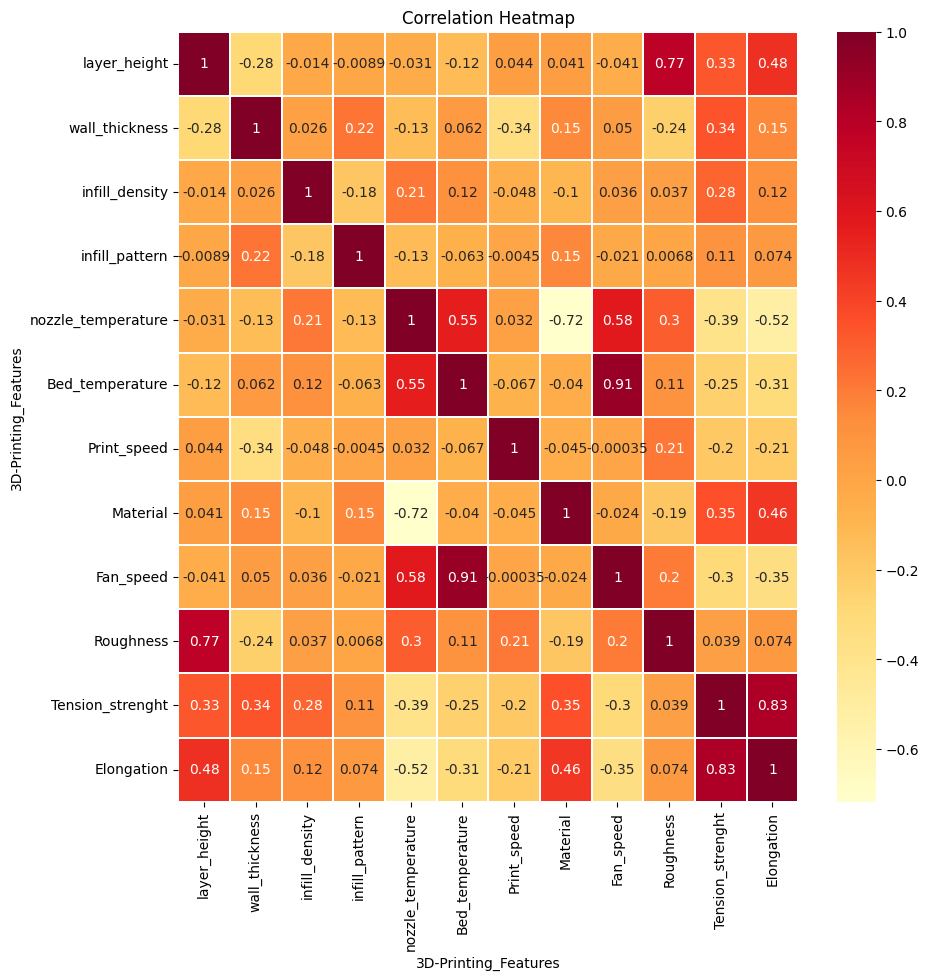

In [4]:
# dertimining the correlation between the 3D-Printing -Features (numerical & graphical):
print(dataframe.corr())
fig, ax= plt.subplots(figsize=(10,10))
plt.title("Correlation Heatmap")
correlation = dataframe.corr()
sns.heatmap(data=correlation, cmap='YlOrRd',annot=True, linewidths=0.05, ax=ax)
plt.xlabel("3D-Printing_Features")
plt.ylabel("3D-Printing_Features")
plt.show()

2. Regression-Analysis between Roughness vs all another Features:

2.1. Implementation of Linear-Regression-Model:

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error

x = dataframe.drop(['Roughness'], axis=1)
y = dataframe['Roughness']

# Spliting the dataset into train- (80%) and test-data (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Definition of the LinearRegression Model:
LR_model = LinearRegression()

# Model-Fitting:
LR_model.fit(x_train, y_train)

# Calculation of the predicted values:
y_pred = LR_model.predict(x_test)

# calculation of the R2-Score:
r2_value = r2_score(y_test, y_pred)
mae_value = mean_absolute_error(y_pred, y_test)

print('r2_Value: {}'.format(r2_value))
print('MAE_Error= {}'.format(mae_value))

r2_Value: 0.5830756148542839
MAE_Error= 48.999979195814426


2.2. Implementation of Polynomial-Regression:

In [6]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

polynomial_degree = 3

poly_modell = PolynomialFeatures(degree=polynomial_degree)
x_train_poly = poly_modell.fit_transform(x_train)
x_test_poly = poly_modell.fit_transform(x_test)

LR2_model = LinearRegression()
LR2_model.fit(x_train_poly, y_train)
y_pred = LR2_model.predict(x_test_poly)

r2_value_poly = r2_score(y_test, y_pred)
mae_value_poly = mean_absolute_error(y_pred, y_test)

print('r2_score= {}'.format(r2_value_poly))
print('mae_value= {}'.format(mae_value_poly))

r2_score= 0.2746996549831513
mae_value= 71.63101918884094


2.3. Implementation of Logistic Regression: 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x = dataframe.drop(['Roughness'], axis=1)
y = dataframe['Roughness']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

LogR_model = LogisticRegression()
LogR_model.fit(x_train, y_train)
y_pred = LogR_model.predict(x_test)

accuracy_value = accuracy_score(y_test, y_pred)

print('Accuracy = {}'.format(accuracy_value))

Accuracy = 0.2857142857142857


c:\Users\Moaiad\Documents\3D-Printing-Technology\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.5. Visualization of the train_data and test_data by selected x and y: 

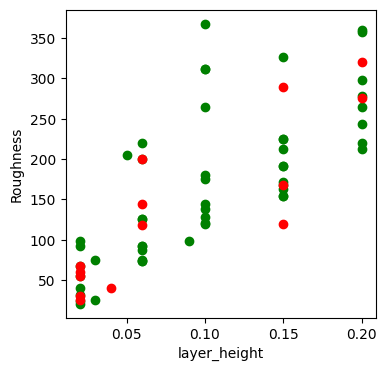

In [8]:
# Vislualization of train_data (80%) and test_data (20%):

x = np.array(dataframe['layer_height']).reshape(-1, 1)
y = np.array(dataframe['Roughness']).reshape(-1, 1)

# Implementation of train_test_splite (sklearn.model_selection):
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Visualization of selected data_features (train_data --> green; test_data --> red):
plt.figure(figsize=(4, 4))
plt.scatter(x_train, y_train, color='green')
plt.scatter(x_test, y_test, color='red')
plt.xlabel('layer_height')
plt.ylabel('Roughness')
plt.show()

Expolative Analysis of layer_height/Roughness and visualization of the data-points utilizing BoxPlots:

[0.02, 0.03, 0.04, 0.05, 0.06, 0.09, 0.1, 0.15, 0.2]


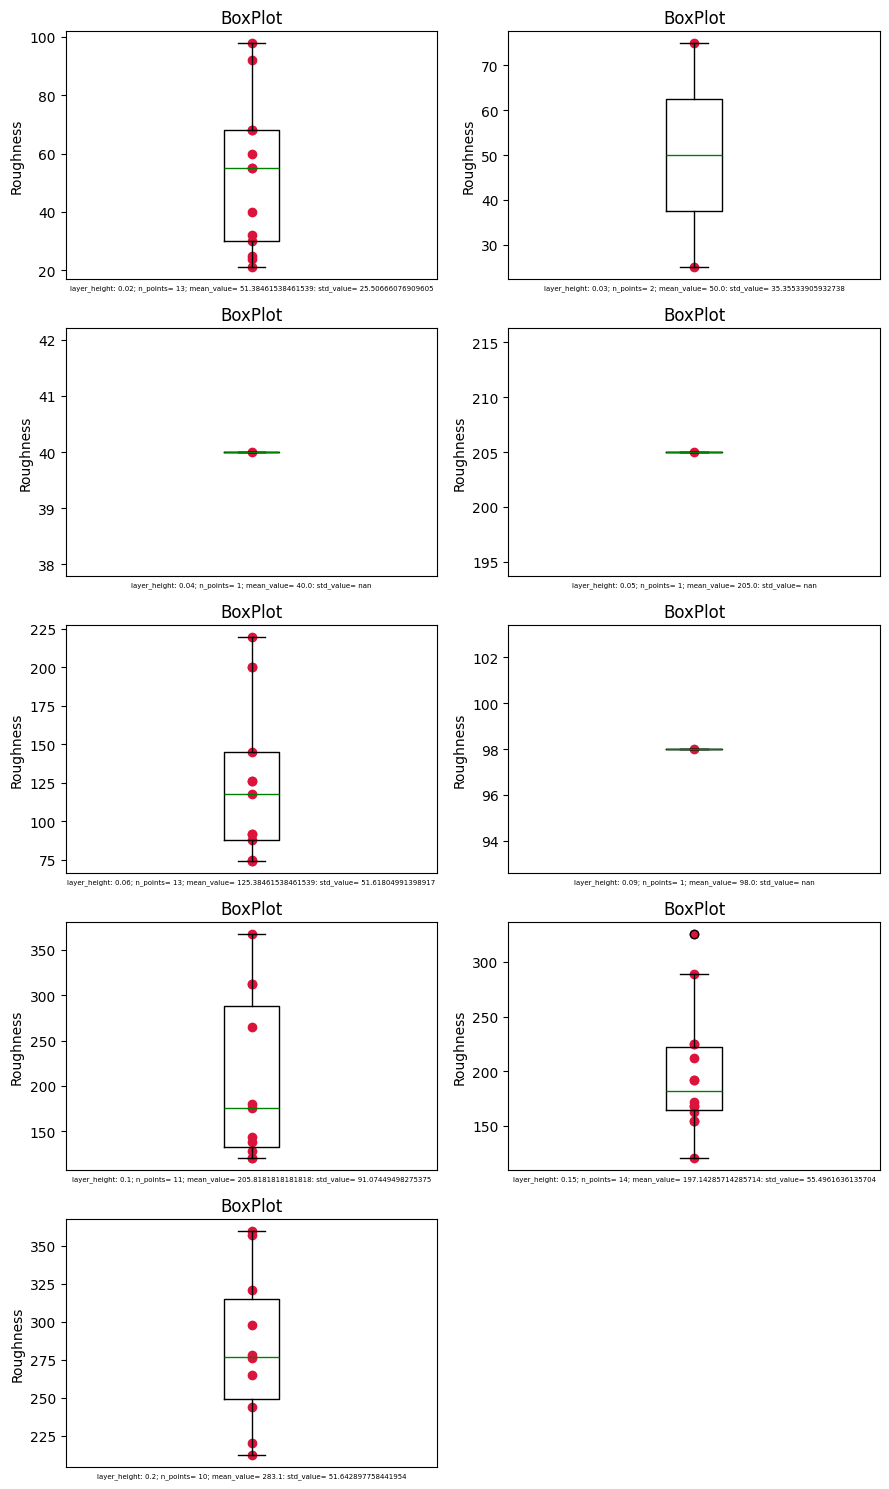

In [9]:
# Statistic analysis of lazer_height and roughness:

## Definition of sorted layer_height values:
layer_height_list = sorted(dataframe['layer_height'].unique())

### printing the sorted layer_height values
print(layer_height_list)

# Visualization of the boxplots and data points:

## calculation of number of rows displaying the subplots:
n = (len(layer_height_list) + 1)//2

### Definition of the Figure size
plt.figure(figsize=(9, n*3))

#### Creation of the subplots regarding to the List elements of layer-height Feature and its Roughness:
for i, element in enumerate(layer_height_list):

    # calculating the number of data points for each element in the list:
    n_points = (dataframe[dataframe['layer_height']==element]['Roughness']).count()

    # calculating the mean for each element in the list:
    mean_value = (dataframe[dataframe['layer_height']== element]['Roughness']).mean()

    # calculating the standard diviasion for each element in the list:
    std_value = (dataframe[dataframe['layer_height']== element]['Roughness']).std()

    # derermining the 25-percent for each element in the list:
    percent_25 = (dataframe[dataframe['layer_height']== element]['Roughness']).quantile(0.25)

    # Determining the 50-Percent for each element in the list:
    percent_50 = (dataframe[dataframe['layer_height']== element]['Roughness']).quantile(0.5)

    # Dertermining the 75-Percent for each element in the list:
    percent_75 = (dataframe[dataframe['layer_height']== element]['Roughness']).quantile(0.75)

    plt.subplot(n, 2, i+1)
    plt.boxplot(dataframe[dataframe['layer_height'] == element]['Roughness'], positions = [element], medianprops = dict(color='green'))
    plt.scatter(x=[element]*len(dataframe[dataframe['layer_height'] == element]),
                y=dataframe[dataframe['layer_height'] == element]['Roughness'], color='crimson')
    plt.title('BoxPlot')
    plt.xlabel('layer_height: {}; n_points= {}; mean_value= {}: std_value= {}'.format(element, n_points, mean_value, std_value), fontsize=5)
    plt.ylabel('Roughness')
    plt.xticks([])
    plt.tight_layout()

plt.show()

2. Regression Analysis:

The aim of the regression analysis is to analyse the relationship between the layer-height and the surface roughness and to optimize the modell-parameter. The main goal is to build better prediction modell utilizing essemble-modell of optimized different regression modells 

2.1. Implementation of Linear Regression Model:

weight = 1149.8873120581245
Bias = 49.52112255714151


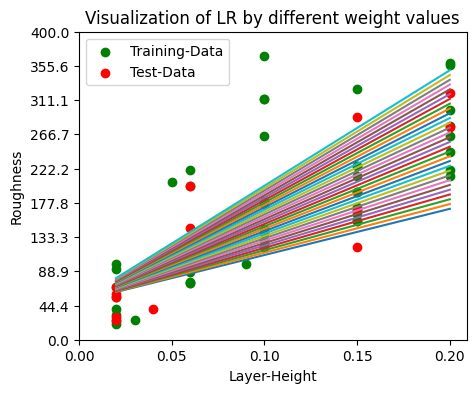

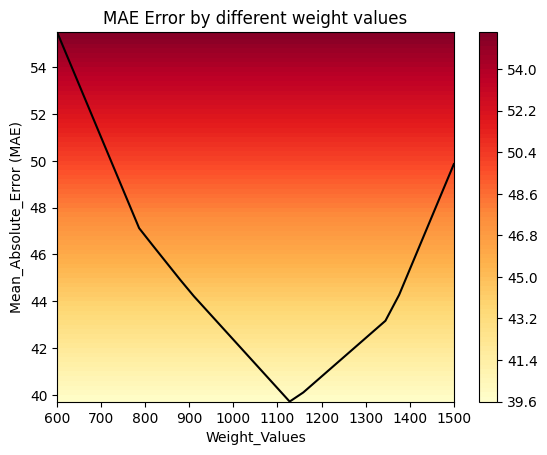

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

x = np.array(dataframe['layer_height']).reshape(-1, 1)
y = np.array(dataframe['Roughness']).reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

LR_modell = LinearRegression()
LR_modell.fit(x_train, y_train)
y_pred_LR = LR_modell.predict(x_test)
mae_LR = mean_absolute_error(y_pred_LR, y_test)

print("weight = {}".format(LR_modell.coef_[0][0]))
print("Bias = {}".format(LR_modell.intercept_[0]))
#print('MAE_LR= {}'.format(mae_LR))

# Effect of test_size on the Model-Error:
#test_size_liste=[0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
#random_state_liste =[42, 43, 44, 45, 46, 47, 48, 49, 50]
#mae_values_LR = np.zeros((len(test_size_liste), len(random_state_liste)))

#for i, test_size in enumerate(test_size_liste):
    #for j, random_state in enumerate(random_state_liste):
        #x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
        #LR_model_advanced = LinearRegression()
        #LR_model_advanced.fit(x_train, y_train)
        #y_pred_LR = LR_model_advanced.predict(x_test)
        #mae_LR_advanced = mean_absolute_error(y_pred_LR, y_test)
        #mae_values_LR[i, j] = mae_LR_advanced

#X_LR_advanced, Y_LR_advanced = np.meshgrid(test_size_liste, random_state_liste)
#plt.figure(figsize=(6,5))
#contour = plt.contourf(X_LR_advanced, Y_LR_advanced, mae_values_LR, cmap='YlOrRd', levels=10)
#plt.colorbar(contour)
#plt.xlabel('test_size')
#plt.ylabel('random_state')
#plt.show()

## Generating weight_bias matrix:

def LR_matrix(min_weight, max_weight, num_weight, min_bias, max_bias, num_bias):
    weight_values = np.linspace(min_weight, max_weight, num_weight)
    bias_values = np.linspace(min_bias, max_bias, num_bias)

    result_matrix = np.zeros((num_weight, num_bias))
    mae_matrix = np.zeros((num_weight, num_bias))

    for j in range(num_bias):
        for i in range(num_weight):
            y_pred = x_test * weight_values[i] + bias_values[j]
            result_matrix[i, j] = y_pred.mean()
            mae_matrix[i, j] = mean_absolute_error(y_test, y_pred)

    return result_matrix, mae_matrix, weight_values, bias_values


# die Grundwerte sind vaiierbar

#min_weight = 0
#max_weight = 1200
#num_weight = 1000
#min_bias = 0
#max_bias = 100
#num_bias = 1000

#result_matrix, mae_matrix, weight_vector, bias_vector = LR_matrix(min_weight, max_weight, num_weight, min_bias, max_bias, num_bias)
#print("Generated weight-values: {}".format(weight_vector))
#print("Generated bias-values: {}".format(bias_vector))

# Auffinden von minimun_MAE und dessen Weight-Bias:

#min_mae_index = np.unravel_index(np.argmin(mae_matrix), mae_matrix.shape)
#min_mae_value = mae_matrix[min_mae_index]
#min_mae_weight = weight_vector[min_mae_index[1]]
#min_mae_bias = bias_vector[min_mae_index[0]]

#print('Minimum MAE= {}'.format(min_mae_value))
#print('Min_MAE_Weight= {}'.format(min_mae_weight))
#print('Min_MAE_Bias= {}'.format(min_mae_bias))

# Plotten der MAE-Matrix
#plt.figure(figsize=(5, 4))
#plt.imshow(mae_matrix, cmap='YlOrRd', interpolation='bilinear', aspect='auto', extent=[min_bias, max_bias, min_weight, max_weight])
#plt.colorbar(label='Mean Absolute Error [MAE]')
#plt.scatter(LR_modell.intercept_, LR_modell.coef_, color='gold', label='Model-Parameter: w_lr= {}; b_lr= {}'.format(LR_modell.intercept_, LR_modell.coef_))
#plt.scatter(min_mae_bias, min_mae_weight,color='green', label='LR mit Min-MAE')
#plt.xlabel('Bias Werte b')
#plt.ylabel('Weight Werte w')
#plt.title('Linear Regression model')
#plt.show()

# Implementation of LR-RegressionModell by different weights and bias=50
x_axis = np.linspace(x.min(), x.max(), 100)
b = 50
w_values = np.linspace(600, 1500, 30)
mae_w_values = []

plt.figure(figsize=(5,4))
plt.scatter(x_train, y_train, color='green', label='Training-Data')
plt.scatter(x_test, y_test, color='red', label='Test-Data')

for w in w_values:
    y_pred_w_test = (x_test*w) + b
    y_pred = (x_axis * w) + b
    mae = mean_absolute_error(y_test, y_pred_w_test)
    mae_w_values.append(mae)
    plt.plot(x_axis, (x_axis*w) + b)

plt.title("Visualization of LR by different weight values")
plt.xlabel('Layer-Height')
plt.ylabel('Roughness')
plt.xticks(np.linspace(0, 0.2, 5))
plt.yticks(np.linspace(0, 400, 10))
plt.legend()
plt.show()

w_mesh, mae_mesh = np.meshgrid(w_values, np.linspace(min(mae_w_values), max(mae_w_values), 100))
mae_mesh_values = np.tile(mae_w_values, (100, 1)).T
plt.contourf(w_mesh, mae_mesh, mae_mesh, levels=100, cmap='YlOrRd', alpha=1)
plt.colorbar()
plt.plot(w_values, mae_w_values, color='black')
plt.title('MAE Error by different weight values')
plt.xlabel('Weight_Values')
plt.ylabel('Mean_Absolute_Error (MAE)')
plt.show()

2.2. Implementation of k-Nearest Neighbors Regressor:

Possible kNN_combinations: 400
The best grid combination: (4, 7) [n_neighbor/leaf_size]


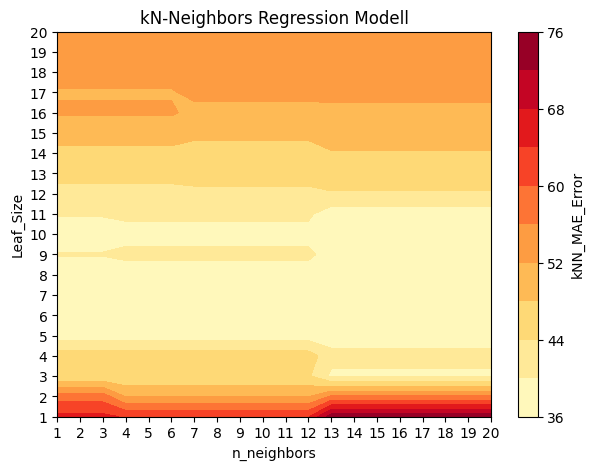

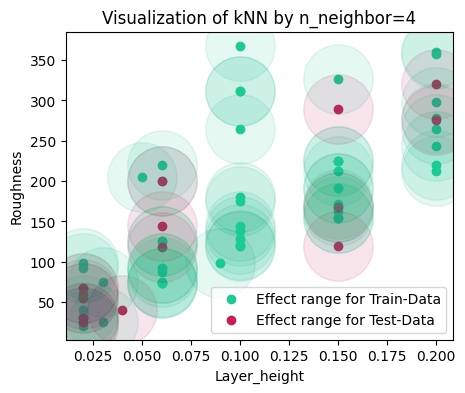

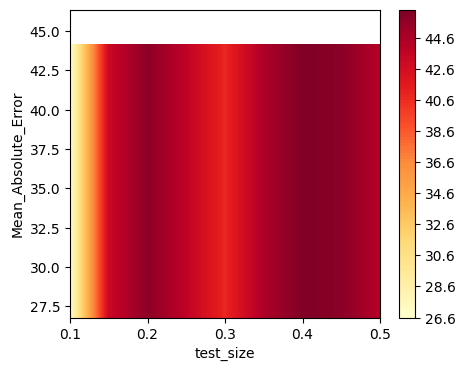

In [11]:
# Regression_task between Fan_speed and Bed_temperature:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

x = np.array(dataframe['layer_height']).reshape(-1, 1)
y = np.array(dataframe['Roughness']).reshape(-1, 1)

#x_scaled = StandardScaler().fit_transform(x)
#y_scaled = StandardScaler().fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Definition of kN-Neighbors_Parameters:
n_neighbor = np.arange(1, 21, 1)
leaf_size = np.arange(1, 21, 1)

# Difinition of the space:
space = {"n_neighbor": n_neighbor, "leaf_size": leaf_size}

# printing the number of the possible combinations:
print("Possible kNN_combinations: {}".format(len(space["n_neighbor"]) * len(space["leaf_size"])))

# Implementation of space:
kNN_error = np.zeros((len(n_neighbor), len(leaf_size)))

for i_index, i in enumerate(space["n_neighbor"]):
    for j_index, j in enumerate(space["leaf_size"]):
        knn_model = KNeighborsRegressor(n_neighbors= int(i), leaf_size= int(j))
        knn_model.fit(x_train, y_train)
        error = mean_absolute_error(y_test, knn_model.predict(x_test))
        kNN_error[i_index, j_index] = error


## Implementation of GridSearch_Modell for kNN-Model:
 ### definition of grid-Search-Error-List:
knn_x, knn_y = np.meshgrid(n_neighbor, leaf_size)

knn_gridsearch_error = []
best_knn_grid = False
min_grid_error = float('inf')

# Definition of the grid_Search data points:

grid_points_x = np.linspace(np.min(knn_x), np.max(knn_x), 10)
grid_points_y = np.linspace(np.min(knn_y), np.max(knn_y), 10)
grid_knn_mesh = np.meshgrid(grid_points_x, grid_points_y)

for m in range(len(grid_points_x)):
    for l in range(len(grid_points_y)):
        grid_knn_neighbor = int(grid_points_x[m])
        grid_knn_lief_size = int(grid_points_y[l])
        gridsearch_kNN_model = KNeighborsRegressor(n_neighbors=grid_knn_neighbor, leaf_size=grid_knn_lief_size)
        gridsearch_kNN_model.fit(x_train, y_train)
        grid_knn_error = mean_absolute_error(y_test, gridsearch_kNN_model.predict(x_test))
        knn_gridsearch_error.append(grid_knn_error)
        if grid_knn_error < min_grid_error:
           min_grid_error = grid_knn_error
           best_knn_grid = (n_neighbor[m], leaf_size[l])

print("The best grid combination: {} [n_neighbor/leaf_size]".format(best_knn_grid))

# Visulaization of the error_distribution and gridSearch points:

plt.figure(figsize=(7,5))
#plt.scatter(grid_points_x, grid_points_y, color='black', label='Grid_Points')
plt.contourf(knn_x, knn_y, kNN_error, cmap='YlOrRd', levels=10)
plt.colorbar(label='kNN_MAE_Error')
plt.xlim(np.min(n_neighbor), np.max(leaf_size))
plt.ylim(np.min(leaf_size), np.max(leaf_size))
plt.xticks(np.arange(min(n_neighbor), max(n_neighbor) + 1, 1))
plt.yticks(np.arange(min(leaf_size), max(leaf_size) + 1, 1))
#plt.scatter(grid_points_x, grid_points_y, color='black', label='Grid_Points')
plt.xlabel('n_neighbors')
plt.ylabel('Leaf_Size')
plt.title('kN-Neighbors Regression Modell')
plt.show()

# Visualization of the effect range
plt.figure(figsize=(5,4))
plt.scatter(x_train, y_train, c='#1ACC94', label='Effect range for Train-Data')
plt.scatter(x_test, y_test, color='#CC1B58',label='Effect range for Test-Data')

for i in np.arange(.1, 1.01, .25):
    plt.scatter(x_train, y_train, s=(100*5*0.1) **2, c='#1ACC94', alpha=1 / i / 150)
    plt.scatter(x_test, y_test, s=(100*5*0.1)**2, c='#CC1B58', alpha=1 / i / 150)
plt.xlabel('Layer_height')
plt.ylabel('Roughness')
plt.title('Visualization of kNN by n_neighbor=4')
plt.legend()
plt.show()

# Effect of test_size on the Model-Error:
test_size_liste = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
random_state_kNN = 42
mae_values_kNN = np.zeros(len(test_size_liste))

for n, test_size_kNN in enumerate(test_size_liste):
    #for m, random_state_kNN in enumerate(random_state_liste):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size_kNN, random_state=random_state_kNN)
    kNN_model_advanced = KNeighborsRegressor(n_neighbors=4, leaf_size=7)
    kNN_model_advanced.fit(x_train, y_train)
    y_pred_kNN = kNN_model_advanced.predict(x_test)
    mae_kNN_advanced = mean_absolute_error(y_pred_kNN, y_test)
    mae_values_kNN[n] = mae_kNN_advanced

X_kNN_advanced, Y_kNN_advanced = np.meshgrid(test_size_liste, mae_values_kNN)
Z_kNN_advanced = np.tile(mae_values_kNN, (len(test_size_liste),1))

plt.figure(figsize=(5, 4))
contour = plt.contourf(X_kNN_advanced, Y_kNN_advanced, Z_kNN_advanced, cmap='YlOrRd', levels=100)
plt.colorbar(contour)
plt.xlabel('test_size')
plt.ylabel('Mean_Absolute_Error')
plt.show()

2.3. Implementation of DecissionTree-Regressor

Possible combinations: 66
Tree Depth: 3
Number OF leavers: 7
Max_Depth: 3
Min Samples Splite: 3
MAE_DT = 31.907467532467535


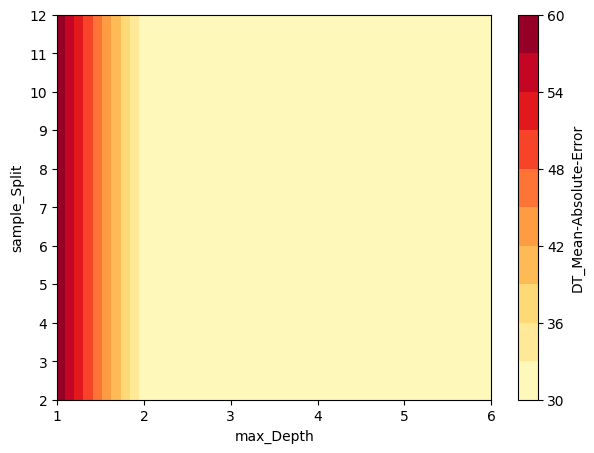

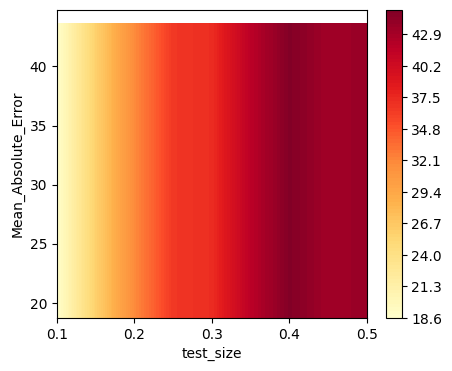

In [12]:
from sklearn.tree import DecisionTreeRegressor

x = np.array(dataframe['layer_height']).reshape(-1, 1)
y = np.array(dataframe['Roughness']).reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Defenition of the DecissionTree-Parameter:
max_depth_DT = np.arange(1, 7, 1)
samples_split_DT = np.arange(2, 13, 1)

# Definition of the space:
DT_space= {"max_depth": max_depth_DT, "samples_split": samples_split_DT}

# Print of the possible combinations:
print("Possible combinations: {}".format(len(DT_space["max_depth"])*len(DT_space["samples_split"])))

DT_modell = DecisionTreeRegressor(random_state=42, max_depth=3, min_samples_split=3)
DT_modell.fit(x_train, y_train)
y_pred_DT= DT_modell.predict(x_test)
mae_DT = mean_absolute_error(y_pred_DT, y_test)

print('Tree Depth: {}'.format(DT_modell.get_depth()))
print('Number OF leavers: {}'.format(DT_modell.get_n_leaves()))
print('Max_Depth: {}'.format(DT_modell.max_depth))
print('Min Samples Splite: {}'.format(DT_modell.min_samples_split))
print('MAE_DT = {}'.format(mae_DT))

# Implementation of the DT_Space:
DT_error = np.zeros((len(max_depth_DT), len(samples_split_DT)))

for d_index, d in enumerate(DT_space["max_depth"]):
    for t_index, t in enumerate(DT_space["samples_split"]):
        DT_modell = DecisionTreeRegressor(max_depth= int(d), min_samples_split= int(t))
        DT_modell.fit(x_train, y_train)
        error= mean_absolute_error(y_test, DT_modell.predict(x_test))
        DT_error[d_index, t_index] = error

DT_x, DT_y = np.meshgrid(max_depth_DT, samples_split_DT)

plt.figure(figsize=(7,5))
plt.contourf(DT_x, DT_y, DT_error.T, cmap='YlOrRd', levels=10)
plt.colorbar(label='DT_Mean-Absolute-Error')
plt.xlim(np.min(max_depth_DT), np.max(max_depth_DT))
plt.ylim(np.min(samples_split_DT), np.max(samples_split_DT))
plt.xticks(np.arange(min(max_depth_DT), max(max_depth_DT) +1, 1))
plt.yticks(np.arange(min(samples_split_DT), max(samples_split_DT) +1, 1))
plt.xlabel('max_Depth')
plt.ylabel('sample_Split')
plt.show()

# Effect of test_size on the Model-Error:
test_size_liste = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
random_state_liste = 42
mae_values_DT = np.zeros(len(test_size_liste))

for k, test_size_DT in enumerate(test_size_liste):
    #for l, random_state_DT in enumerate(random_state_liste):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size_DT, random_state=random_state_liste)
    DT_model_advanced = DecisionTreeRegressor(max_depth=3, min_samples_split=7)
    DT_model_advanced.fit(x_train, y_train)
    y_pred_DT = DT_model_advanced.predict(x_test)
    mae_DT_advanced = mean_absolute_error(y_pred_DT, y_test)
    mae_values_DT[k] = mae_DT_advanced

X_DT_advanced, Y_DT_advanced = np.meshgrid(test_size_liste, mae_values_DT)
Z_DT_advanced = np.tile(mae_values_DT, (len(test_size_liste), 1))

plt.figure(figsize=(5, 4))
contour = plt.contourf(X_DT_advanced, Y_DT_advanced, Z_DT_advanced, cmap='YlOrRd', levels=100)
plt.colorbar(contour)
plt.xlabel('test_size')
plt.ylabel('Mean_Absolute_Error')
plt.ylim(np.min(mae_values_DT), np.max(mae_values_DT))
plt.show()

# Visualisierung
# Comparing the DT-Models with different Depths:

#fig, axes = plt.subplots(3,3, figsize=(15,7), sharex= True, sharey=True)

#for depth, axis in enumerate(axes.ravel()):
    #if depth == 0:
        #axis.hlines(np.mean(y), xmin=0, xmax=x.max(), color='#CC1858')

    #else:
       # dtr = DecisionTreeRegressor(max_depth=depth)
        #dtr.fit(x.reshape(-1,1), y)
        #axis.plot(np.linspace(0, 0.2, 400), dtr.predict(np.linspace(0, 400, 400).reshape(-1, 1)), c="#CC1858")

    #axis.scatter(x, y, c="#1ACC94")
    #axis.set_ylim(0, 400)
    #axis.set_title("DTR Maximale Tiefe {}".format(depth))
#plt.show()

3. Klassification task for the 3D-Printed materials

Model: DecissionTree
Accuracy: 0.7142857142857143
Confusion_Matric: [[6 3]
 [1 4]]
---------------------------------------------------------------
Model: RandomForest
Accuracy: 0.9285714285714286
Confusion_Matric: [[8 1]
 [0 5]]
---------------------------------------------------------------
Model: KNeighbors
Accuracy: 0.7142857142857143
Confusion_Matric: [[6 3]
 [1 4]]
---------------------------------------------------------------


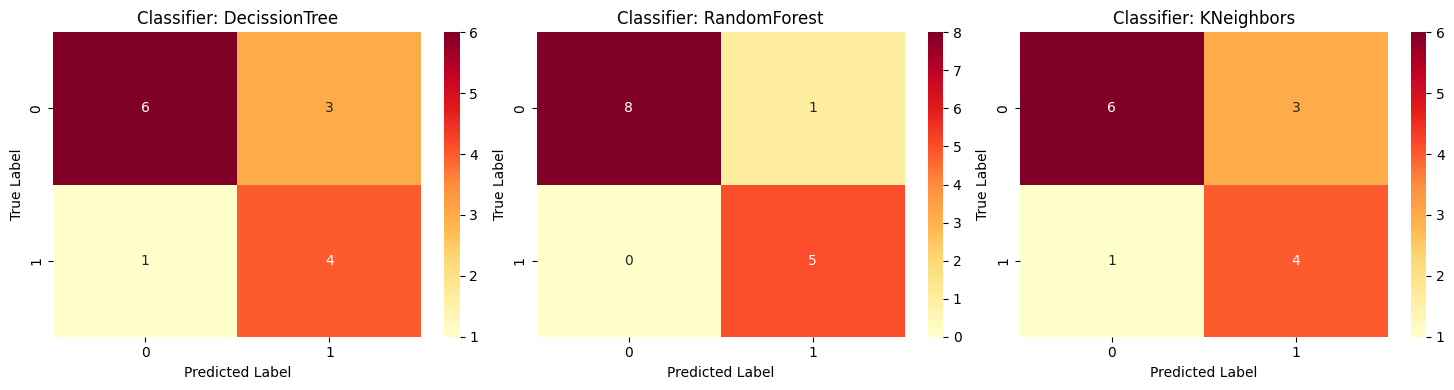

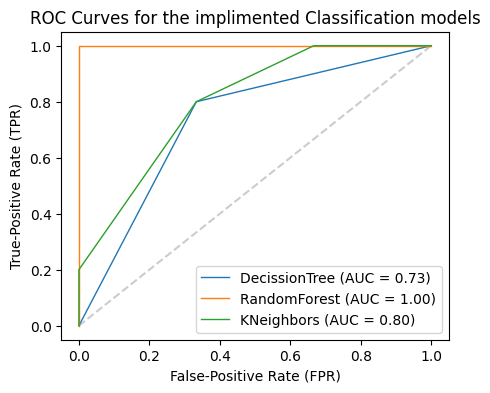

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn import metrics


label_encoder = LabelEncoder()
dataframe['infill_pattern'] = label_encoder.fit_transform(dataframe['infill_pattern'])
dataframe['Material'] = label_encoder.fit_transform(dataframe['Material'])

x = dataframe.drop('Material', axis=1)
y= dataframe['Material']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = [("DecissionTree", DecisionTreeClassifier(random_state=42)), ("RandomForest", RandomForestClassifier(random_state=42)), ("KNeighbors", KNeighborsClassifier())]

plt.figure(figsize=(15, 4))

for i, (name, model) in enumerate(models):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Model: {}".format(name))
    print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
    print("Confusion_Matric: {}".format(confusion_matrix(y_test, y_pred)))
    print("---------------------------------------------------------------")

    # Berechnung der Konfusionsmatrix
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(1, 3, i+1)
    sns.heatmap(cm, annot=True, fmt="d", cmap='YlOrRd', cbar=True)
    plt.title('Classifier: {}'.format(name))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()

plt.show()

# Implementation of ROC-Graph:

plt.figure(figsize=(5, 4))
plt.title('ROC Curves for the implimented Classification models')
plt.plot([0, 1], [0, 1], ls="--", c="black", alpha=0.2)

for name, model in models:
    model.fit(x_train, y_train)

    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(x_test)[:, 1]
    else:
        y_pred_prob = model.predict(x_test)

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    roc_auc = metrics.auc(fpr, tpr)

    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(name, roc_auc), lw=1)


plt.xlabel("False-Positive Rate (FPR)")
plt.ylabel("True-Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.show()